<a href="https://colab.research.google.com/github/gilbert-umuzi/Analysis-of-CPI-and-Interest-Rates-South-Africa-and-the-United-States/blob/main/Analysis_of_CPI_and_Interest_Rates_South_Africa_and_the_United_States.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of CPI and Interest Rates: South Africa and the United States

This Jupyter Notebook focuses on analyzing and comparing the Consumer Price Index (CPI) and interest rates between South Africa and the United States. The goal is to understand the trends and correlations in inflation and monetary policy between these two economies.

## Data Sources
- South African CPI: [Link](https://fred.stlouisfed.org/series/CPALTT01ZAM659N)
- South African Repo Rate: [Link](https://www.resbank.co.za/en/home/what-we-do/statistics/key-statistics/selected-historical-rates)
- US CPI: [Link](https://fred.stlouisfed.org/series/CPIAUCNS)
- US Federal Funds Rate: [Link](https://fred.stlouisfed.org/series/DFF)

## Libraries Used
- Pandas: For data manipulation and analysis.
- NumPy: For numerical operations.
- Matplotlib and Seaborn: For creating static, interactive, and informative visualizations.
- Plotly: For interactive data visualization.

This report offers a comprehensive examination of the Consumer Price Index (CPI) and interest rate policies in South Africa and the United States from the mid-20th century to the present day. Utilizing a variety of visual tools, we've distilled the complex relationship between inflation indicators and monetary policy decisions across different economic landscapes and historical contexts.

## Key Findings:

- **Correlation and Volatility**: The South African economy demonstrates a tighter correlation between CPI and Repo Rates, especially in earlier decades, with notable volatility. In contrast, the US shows a more complex relationship with periods of high interest rates not always matching high inflation rates.

- **Policy Responses**: Monetary policy responses to inflationary pressures have varied, with South Africa generally maintaining higher interest rates compared to the US. The aggressive stance of the US Federal Reserve in the 1980s is a clear outlier, illustrating a determined effort to curb inflation.

- **Global Trends**: Both economies reflect the global trend of decreasing interest rates post-2000, with recent data pointing to a divergence in policy response to the current economic environment.

- **Decadal Shifts**: The evolution of each country's monetary policy is marked by shifts in economic strategies, with the 1980s being particularly distinct for the US due to steep interest rate hikes. In recent years, the US has experienced low to negative interest rates, while South Africa has shown higher rates, potentially indicating differing current economic conditions or policy approaches.

- **Stabilization and Current Trends**: The analysis indicates periods of stabilization in both countries, with the most recent decade revealing lower rates in the US and a rise in South African rates. This may highlight differing approaches to post-2000 economic challenges and the current economic climate.

## Methodology:

This report employs time series analysis, boxplots, swarmplots, and scatter plots to illustrate the data. Each visualization method brings unique insights, from the general distribution of values to the specifics of policy responses over time.


**Author:** Gilbert Pooley \
**Date:** 2023-12-12

---


## Installations and Libraries

In [235]:
# Installing Plotly for interactive data visualization
!pip install plotly

In [236]:
# Importing necessary libraries for data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.graph_objs as go

In [170]:
# Loading CPI and interest rate data for South Africa and the United States
# Data is indexed by date for ease of time series analysis
za_cpi = pd.read_csv('ZA inflation.csv', index_col=0)  # South African CPI
za_repo = pd.read_csv('ZA repo rate.csv', index_col=0)  # South African Repo Rate
us_cpi = pd.read_csv('US CPIAUCNS.csv', index_col=0)    # US CPI
us_dff = pd.read_csv('US DFF.csv', index_col=0)         # US Federal Funds Rate

## Data Cleaning and Preprocessing

In this section, we will clean and preprocess the data for our analysis. This includes handling missing values, date formatting, and any other necessary data transformation steps to ensure accurate and meaningful analysis.

In [171]:
us_cpi.tail()

CPIAUCNS
DATE                
2023-07-01   305.691
2023-08-01   307.026
2023-09-01   307.789
2023-10-01   307.671
2023-11-01   307.051

Converting CPI index to year-over-year growth rate for better analysis of inflation trends

In [172]:
# Assuming 'us_cpi' is your DataFrame with CPI data and the index is in datetime format
us_cpi.index = pd.to_datetime(us_cpi.index)  # Convert index to datetime if not already

# Calculate the year-over-year growth rate
us_cpi['us_cpi_rate'] = us_cpi['CPIAUCNS'].pct_change(periods=12) * 100  # Replace 'CPI_column' with your actual CPI column name

# The 'growth_rate' column now contains the growth rate compared to the same month in the previous year


In [173]:
us_cpi.tail()

CPIAUCNS  us_cpi_rate
DATE                             
2023-07-01   305.691     3.177780
2023-08-01   307.026     3.665112
2023-09-01   307.789     3.699698
2023-10-01   307.671     3.241145
2023-11-01   307.051     3.137271

In [174]:
us_cpi = us_cpi.drop(columns = ['CPIAUCNS'])

In [175]:
us_cpi.head()

us_cpi_rate
DATE                   
1913-01-01          NaN
1913-02-01          NaN
1913-03-01          NaN
1913-04-01          NaN
1913-05-01          NaN

In [176]:
us_cpi = us_cpi.dropna()

In [179]:
us_cpi.tail()

us_cpi_rate
DATE                   
2023-07-01     3.177780
2023-08-01     3.665112
2023-09-01     3.699698
2023-10-01     3.241145
2023-11-01     3.137271

In [180]:
za_repo.head()

IRSTCB01ZAM156N
DATE                       
1960-01-01             3.66
1960-02-01             3.73
1960-03-01             3.72
1960-04-01             3.77
1960-05-01             3.79

In [181]:
# rename the column description as repo_rate
za_repo.rename(columns={'IRSTCB01ZAM156N': 'repo_rate'}, inplace=True)

In [182]:
za_repo.columns

Index(['repo_rate'], dtype='object')

In [183]:
za_cpi.head()

CPALTT01ZAM659N
DATE                       
1960-01-01         0.336700
1960-02-01         0.675676
1960-03-01         0.673401
1960-04-01         1.010101
1960-05-01         1.346801

In [184]:
za_cpi = za_cpi.rename(columns={'CPALTT01ZAM659N': 'cpi'})

In [185]:
za_cpi.head()

cpi
DATE                
1960-01-01  0.336700
1960-02-01  0.675676
1960-03-01  0.673401
1960-04-01  1.010101
1960-05-01  1.346801

In [186]:
us_cpi.head()

us_cpi_rate
DATE                   
1914-01-01     2.040816
1914-02-01     1.020408
1914-03-01     1.020408
1914-04-01     0.000000
1914-05-01     2.061856

In [187]:
us_dff.head()

DFF
DATE            
1954-07-01  1.13
1954-07-02  1.25
1954-07-03  1.25
1954-07-04  1.25
1954-07-05  0.88

In [188]:
# Convert the index of each DataFrame to datetime format
us_cpi.index = pd.to_datetime(us_cpi.index)
za_cpi.index = pd.to_datetime(za_cpi.index)
za_repo.index = pd.to_datetime(za_repo.index)
us_dff.index = pd.to_datetime(us_dff.index)

In [197]:
# Resample the data to monthly frequency using the mean (or another appropriate method)
us_dff_monthly = us_dff.resample('MS').last()  # 'MS' stands for Month Start frequency

# Reindex to a common date range
common_index = pd.date_range(start=min(us_cpi_monthly.index.min(), za_cpi.index.min(), za_repo_monthly.index.min(), us_dff_monthly.index.min()),
                             end=max(us_cpi_monthly.index.max(), za_cpi.index.max(), za_repo_monthly.index.max(), us_dff_monthly.index.max()),
                             freq='MS')

us_cpi_reindexed = us_cpi.reindex(common_index)
za_cpi_reindexed = za_cpi.reindex(common_index)
za_repo_reindexed = za_repo.reindex(common_index)
us_dff_reindexed = us_dff_monthly.reindex(common_index)

# Now all dataframes have the same date index

In [198]:
us_dff_reindexed

DFF
1954-07-01  0.25
1954-08-01  1.44
1954-09-01  1.44
1954-10-01  1.13
1954-11-01  1.38
...          ...
2023-08-01  5.33
2023-09-01  5.33
2023-10-01  5.33
2023-11-01  5.33
2023-12-01  5.33

[834 rows x 1 columns]

In [204]:
# Combine all reindexed dataframes into one
combined_df = pd.concat([za_cpi_reindexed, za_repo_reindexed, us_cpi_reindexed, us_dff_reindexed], axis=1)

# Rename the columns for clarity
combined_df.columns = ['za_cpi','za_repo','us_cpi','us_dff']

In [209]:
combined_df

za_cpi  za_repo    us_cpi  us_dff
1954-07-01       NaN      NaN  0.373134    0.25
1954-08-01       NaN      NaN  0.000000    1.44
1954-09-01       NaN      NaN -0.371747    1.44
1954-10-01       NaN      NaN -0.740741    1.13
1954-11-01       NaN      NaN -0.371747    1.38
...              ...      ...       ...     ...
2023-08-01  4.797742     8.25  3.665112    5.33
2023-09-01  5.451128     8.25  3.699698    5.33
2023-10-01       NaN     8.25  3.241145    5.33
2023-11-01       NaN     8.25  3.137271    5.33
2023-12-01       NaN      NaN       NaN    5.33

[834 rows x 4 columns]

In [208]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 834 entries, 1954-07-01 to 2023-12-01
Freq: MS
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   za_cpi   765 non-null    float64
 1   za_repo  767 non-null    float64
 2   us_cpi   833 non-null    float64
 3   us_dff   834 non-null    float64
dtypes: float64(4)
memory usage: 32.6 KB


## Visualisations

Comparative Analysis of CPI and Interest Rates

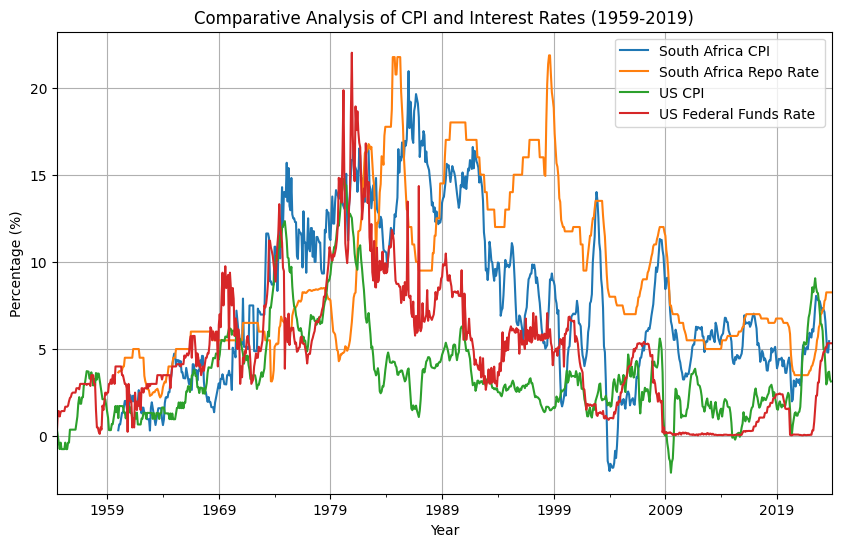

In [248]:
# Plotting the combined data frame with appropriate labeling and title
ax = combined_df.plot(figsize=(10, 6), title='Comparative Analysis of CPI and Interest Rates (1959-2019)')

# Setting the title for the axes
ax.set_xlabel('Year')
ax.set_ylabel('Percentage (%)')

# Adding a legend to clarify the data series
ax.legend(['South Africa CPI', 'South Africa Repo Rate', 'US CPI', 'US Federal Funds Rate'])

# Set a grid for better readability of the graph
ax.grid(True)

# Display the plot
plt.show()


This graph shows the Consumer Price Index (CPI) and interest rates for both South Africa (ZA) and the United States (US) back to 1959. With the extended timeline, we can see a longer-term view of the economic indicators and identify patterns and trends. Here's an analysis from an economic perspective:

**Long-Term Trends:**

* The data for South Africa's CPI and repo rate, as well as the US CPI and federal funds rate, show more pronounced volatility in the earlier decades, particularly from the 1970s through the early 1990s. This could be indicative of the global economic environment during this time, which included several oil shocks, high inflation, and the transition from fixed to floating exchange rates in many countries.
* The peaks in the South African repo rate during the 1980s and early 1990s might reflect monetary policy efforts to combat the high inflation of those periods. The decline post-1990s may suggest a stabilization of the economy and inflation rates.

**Inflationary Periods and Central Bank Response:**

* Periods of high inflation are evident in both countries during the 1970s and 1980s, which is a common trait in many economies during this period due to oil price shocks and other factors.
* In response to these inflationary pressures, central banks in both countries appear to have raised interest rates significantly as a measure to control inflation, which is consistent with monetary policy theory.

**Economic and Political Context:**

* South Africa's economic indicators would have been influenced by the country's political situation, including the transition out of apartheid in the 1990s. Economic sanctions and the subsequent reintegration into the global economy could have contributed to the fluctuations seen.
* For the US, the Volcker shock in the early 1980s, where the Federal Reserve raised interest rates dramatically to curb inflation, can be seen as a sharp increase in the federal funds rate.

**Comparison Between Economies:**

* The US economy shows a long-term downward trend in both inflation and interest rates from the 1980s onwards, reflecting a period of relative economic stability and growth, apart from the recessionary period following the 2008 financial crisis.
* South Africa's indicators show more extreme fluctuations, which may reflect both domestic economic challenges and the impact of global economic conditions on an emerging market.

**Recent Trends:**

* The graph shows an uptick in the US federal funds rate and the South African repo rate in recent years, which could indicate tightening monetary policies in response to inflationary pressures or economic growth.
* The recent trends will need to be watched closely to see if they signal a longer-term shift in monetary policy or are temporary adjustments.

**Caveats:**

* It's important to note that the CPI may not be directly comparable over such a long timeframe due to changes in the way it is calculated, as well as the basket of goods and services it represents.
* Additionally, the effectiveness and goals of monetary policy may have evolved over time, influencing how interest rates are adjusted in response to economic conditions.

Focus on more recent date range (post 1994 democratic elections in ZA)

<Figure size 1000x600 with 0 Axes>

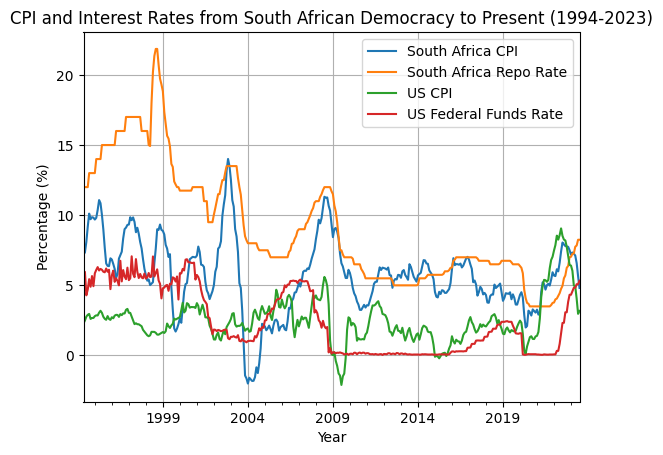

In [251]:
# Define the date range
start_date = '1994-04-27'
end_date = '2023-07-31'

# Confirm that there is data within the specified date range
if not combined_df[(combined_df.index >= start_date) & (combined_df.index <= end_date)].empty:
    # Filter the DataFrame for the specified date range
    filtered_df = combined_df[(combined_df.index >= start_date) & (combined_df.index <= end_date)]

    # Set the figure size for better readability
    plt.figure(figsize=(10, 6))

    # Plotting the filtered DataFrame
    ax = filtered_df.plot()

    # Setting the title and labels
    ax.set_title('CPI and Interest Rates from South African Democracy to Present (1994-2023)')
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage (%)')

    # Adding a legend
    ax.legend(['South Africa CPI', 'South Africa Repo Rate', 'US CPI', 'US Federal Funds Rate'])

    # Adding a grid
    ax.grid(True)

    # Display the plot
    plt.show()
else:
    print("No data available within the specified date range.")


This graph show the time series of four different economic indicators: the Consumer Price Index (CPI) and repo rates for South Africa (ZA), as well as the CPI and federal funds rate (DFF) for the United States (US). These indicators are commonly used to assess inflation and central bank policy over time. Here's an analysis from an economic perspective:

**Volatility and Trends:**

* The South African repo rate (orange line) shows high volatility in the early years depicted on the graph, with a peak around 1998. It then trends downwards, indicating a period of monetary policy easing.
* The South African CPI (blue line) shows an upward trend until the early 2000s, suggesting increasing inflation during that period. Post-2000, there is a clear downward trend in volatility, which could indicate stabilization in price levels or effective inflation targeting by the South African Reserve Bank.
* The US CPI (green line) shows less volatility compared to the South African CPI, with moderate fluctuations over the period. There are slight peaks around the early 2000s and post-2008, possibly reflecting economic shocks or changes in economic activity.
* The US federal funds rate (red line) shows significant movement, with peaks aligning with monetary tightening phases. The steep decline post-2008 corresponds with the global financial crisis, where the Federal Reserve lowered rates to near-zero levels to stimulate the economy.

**Correlation between Rates and Inflation:**

* Generally, there appears to be an inverse relationship between the repo rates and CPI in South Africa, which aligns with economic theory. As the central bank increases interest rates, it often cools inflation, and vice versa.
* For the US, the correlation between the federal funds rate and CPI is less clear from this graph alone. There is a period post-2008 where both the federal funds rate and CPI are low, which is consistent with a response to economic recession and low inflation pressures.

**Policy Implications:**

* The data suggests that both the South African Reserve Bank and the Federal Reserve respond to changes in inflation with adjustments in interest rates, consistent with a Taylor-rule approach to monetary policy.
* The declining trend in both countries' interest rates from the early 2000s onwards reflects a long-term global trend of decreasing interest rates, which has implications for the effectiveness of monetary policy and the room for central banks to maneuver during economic downturns.

**Differences between the Economies:**

* The greater volatility in the South African indicators suggests a more turbulent economic environment, potentially reflecting emerging market dynamics, currency fluctuations, and external vulnerabilities.
* The more moderate movements in the US indicators reflect its status as a developed economy with more stable economic conditions and a reserve currency.

**Recent Trends:**

* The most recent data on the graph shows a sharp increase in the US federal funds rate, which could indicate a tightening monetary policy in response to perceived inflationary pressures or economic overheating.
* The uptick in the South African repo rate at the end of the graph may suggest a similar response to domestic inflationary concerns.

### Dual-axis timeseries

Comparing ZA inflation and interest rates

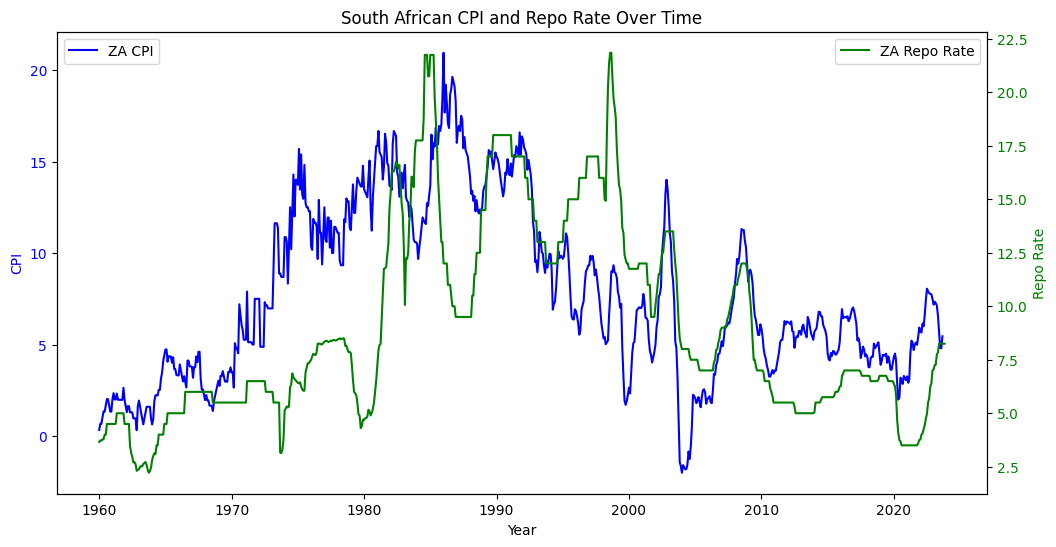

In [221]:
# Set the figure and first axis
plt.figure(figsize=(12, 6))
ax1 = plt.gca()  # Get current axis
ax2 = ax1.twinx()  # Create another axis that shares the same x-axis

# Plot CPI on ax1
ax1.plot(combined_df.index, combined_df['za_cpi'], color='blue', label='ZA CPI')
ax1.set_xlabel('Year')
ax1.set_ylabel('CPI', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot Repo Rate on ax2
ax2.plot(combined_df.index, combined_df['za_repo'], color='green', label='ZA Repo Rate')
ax2.set_ylabel('Repo Rate', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add title and legend
plt.title('South African CPI and Repo Rate Over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


Comparing US inflation and interest rates

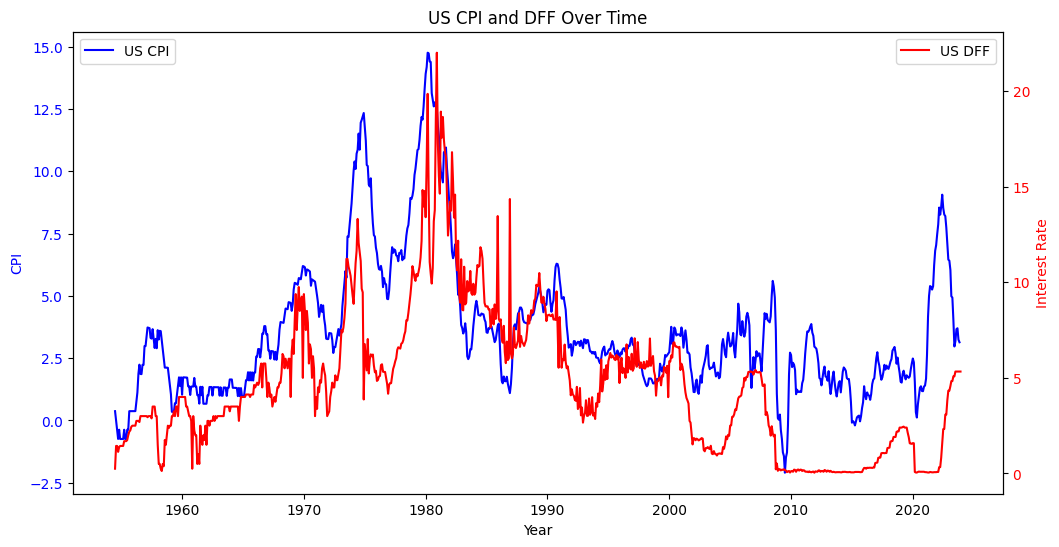

In [222]:
# Set the figure and first axis
plt.figure(figsize=(12, 6))
ax1 = plt.gca()  # Get current axis
ax2 = ax1.twinx()  # Create another axis that shares the same x-axis

# Plot CPI on ax1
ax1.plot(combined_df.index, combined_df['us_cpi'], color='blue', label='US CPI')
ax1.set_xlabel('Year')
ax1.set_ylabel('CPI', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot Repo Rate on ax2
ax2.plot(combined_df.index, combined_df['us_dff'], color='red', label='US DFF')
ax2.set_ylabel('Interest Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legend
plt.title('US CPI and DFF Over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


Contrasting this graph, which shows the United States Consumer Price Index (US CPI) and the Federal Funds Rate (US DFF) over time, with the previous South African graph reveals a number of points:

**Volatility and Response:** Both the US CPI and DFF exhibit significant volatility, particularly during the 1970s and early 1980s, which is a common trait in many economies due to oil price shocks and high inflation globally. However, the Federal Reserve's response, as seen in the federal funds rate, appears more pronounced and swift compared to the South African repo rate movements. The sharp peaks in the US DFF during the 1980s reflect the Federal Reserve's aggressive policy to combat inflation, famously known as the 'Volcker Shock'.

**Policy Effectiveness:** The relatively synchronized movements of the US CPI and DFF suggest effective monetary policy targeting by the Federal Reserve. Notably, after the steep hikes in interest rates in the early 1980s, the inflation rate (CPI) drops considerably, which could be attributed to the tight monetary policy stance.

**Stabilization Post-2000:** Similar to the South African data, the US data shows a period of relative stability in both inflation and interest rates post-2000, with the exception of the response to the 2008 financial crisis, where the DFF was lowered to near-zero levels to stimulate the economy.

**Recent Trends:** The recent spike in the federal funds rate in the US is sharp and pronounced, reflecting an assertive policy shift likely in response to inflationary pressures or economic recovery needs. This contrasts with the South African repo rate, which, while also increasing, shows a less abrupt movement.

**Inflation Peaks:** The peaks in US CPI during the 1970s and early 1980s are quite sharp, which may reflect the high inflation environment of the time, commonly referred to as 'stagflation'. South Africa's CPI also reflects high inflation during this period, though the data suggests that the country experienced its highest inflation rates slightly later than the US.

**Economic Context:** The US economy, as a large developed economy, may have different inflation dynamics compared to South Africa, an emerging market. This includes different exposures to global economic shocks, domestic policy effectiveness, and the role of the US dollar as a global reserve currency.

**Scale and Range:** The US graph shows the CPI ranging from slightly negative to over 15, while the DFF varies from 0 to above 20. This indicates periods of deflation as well as high inflation, and a wide range of interest rate adjustments. The South African data, on the other hand, does not show negative inflation and its repo rate never exceeds the 22.5 mark as indicated in its respective graph.

Comparing US and ZA interest rates

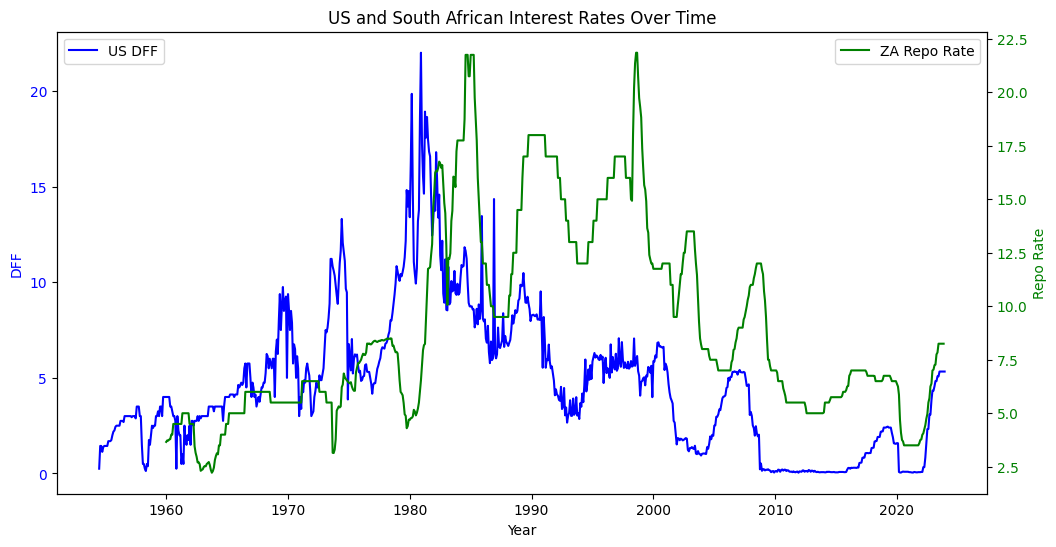

In [223]:
# Set the figure and first axis
plt.figure(figsize=(12, 6))
ax1 = plt.gca()  # Get current axis
ax2 = ax1.twinx()  # Create another axis that shares the same x-axis

# Plot CPI on ax1
ax1.plot(combined_df.index, combined_df['us_dff'], color='blue', label='US DFF')
ax1.set_xlabel('Year')
ax1.set_ylabel('DFF', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot Repo Rate on ax2
ax2.plot(combined_df.index, combined_df['za_repo'], color='green', label='ZA Repo Rate')
ax2.set_ylabel('Repo Rate', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add title and legend
plt.title('US and South African Interest Rates Over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


Data frequency: boxplots and swarmplots

In [218]:
# Get the most recent data for each series
most_recent_non_nan = {}

for column in combined_df.columns:
    last_valid_idx = combined_df[column].last_valid_index()
    most_recent_non_nan[column] = combined_df.at[last_valid_idx, column]

most_recent_non_nan

{'za_cpi': 5.45112781954888,
 'za_repo': 8.25,
 'us_cpi': 3.1372707088417773,
 'us_dff': 5.33}

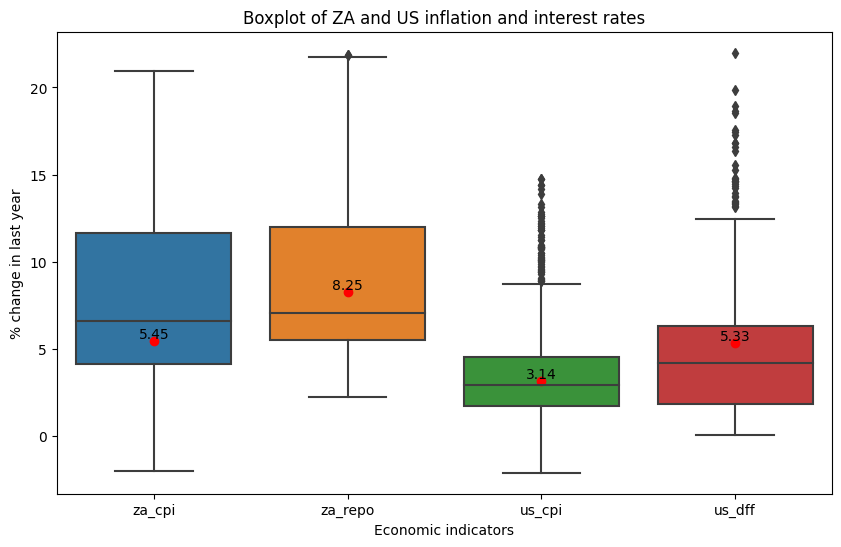

In [253]:
# Boxplot with most recent non-NaN observations annotated
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df)
for i, (column, value) in enumerate(most_recent_non_nan.items()):
    plt.scatter(i, value, color='red', marker='o')
    plt.text(i, value, f'{value:.2f}', color='black', ha='center', va='bottom')
plt.title('Boxplot of ZA and US inflation and interest rates')
plt.ylabel('% change in last year')
plt.xlabel('Economic indicators')
plt.show()

**Most Recent Observations:** (shown as red dots, with labels of their values)

* For the South African CPI, the most recent change is lower than the median, suggesting a recent decrease in inflation rates or a successful stabilization effort.
* The recent South African Repo Rate is substantially higher than the CPI, which could imply a tightening of monetary policy, possibly in anticipation of inflationary pressures or as a response to other economic factors.
* The most recent US CPI change is higher than the median, indicating a recent uptick in inflation, which could be due to economic recovery efforts, supply chain disruptions, or other short-term economic pressures.
The recent US Federal Funds Rate (DFF) is also higher than the median, suggesting recent monetary tightening by the Federal Reserve, likely in response to the increase in inflation.

**Interquartile Ranges and Spread:**

* The interquartile range (IQR) for South African CPI is quite tight, indicating less variability in inflation rates over the years compared to the Repo Rate, which has a wider IQR, signifying more variability in interest rates.
* The US CPI has a relatively narrow IQR, showing a consistent control of inflation, while the Federal Funds Rate has a much wider spread, reflecting a broader range of responses to economic conditions.

**Outliers:**

* There are several outliers for both countries' interest rates, indicating periods when the rates were significantly higher than typical. For the US, this could correspond to the aggressive interest rate hikes in the late 1970s and early 1980s. For South Africa, outliers could reflect periods of economic instability or aggressive inflation targeting.

**Comparative Analysis:**

* When comparing the two countries, the South African indicators show a higher median and more variability, reflecting the challenges and dynamics of an emerging market economy. In contrast, the US indicators reflect a more stable and mature economy with lower median inflation and interest rate changes.

**Historical Context:**

* Considering the time series analysis, where both countries showed peaks in interest rates during periods of high inflation, the boxplot provides a snapshot of how these economic indicators have varied over time, with the recent observations highlighting the current economic stance of each country.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

11.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



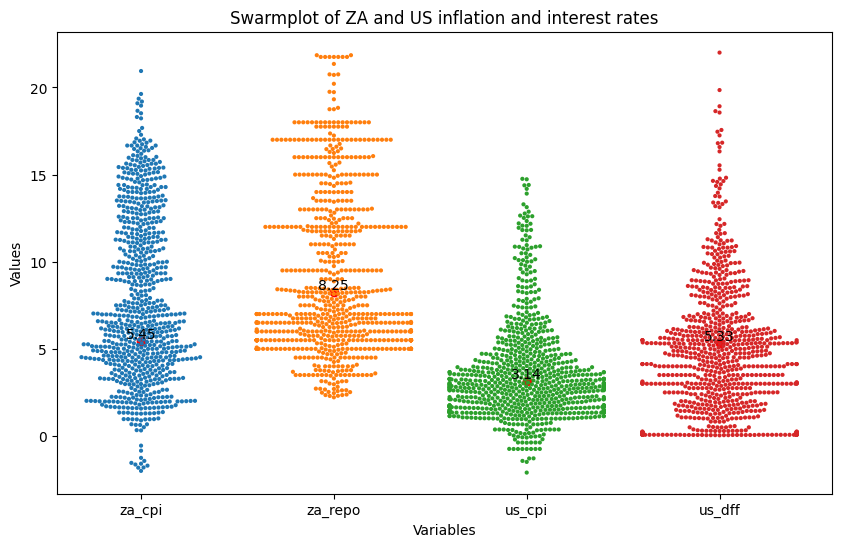

In [254]:
# Swarmplot with most recent non-NaN observations annotated
plt.figure(figsize=(10, 6))
sns.swarmplot(data=combined_df, size=3)
for i, (column, value) in enumerate(most_recent_non_nan.items()):
    plt.scatter(i, value, color='red', marker='o')
    plt.text(i, value, f'{value:.2f}', color='black', ha='center', va='bottom')
plt.title('Swarmplot of ZA and US inflation and interest rates')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.show()

### Correlations

In [232]:
# Create a decade column to have labels like "1950s", "1960s", etc.
combined_df['decade'] = combined_df.index.year.map(lambda x: f'{x - x % 10}s')

Scatter Plot for ZA CPI vs. ZA Repo Rate

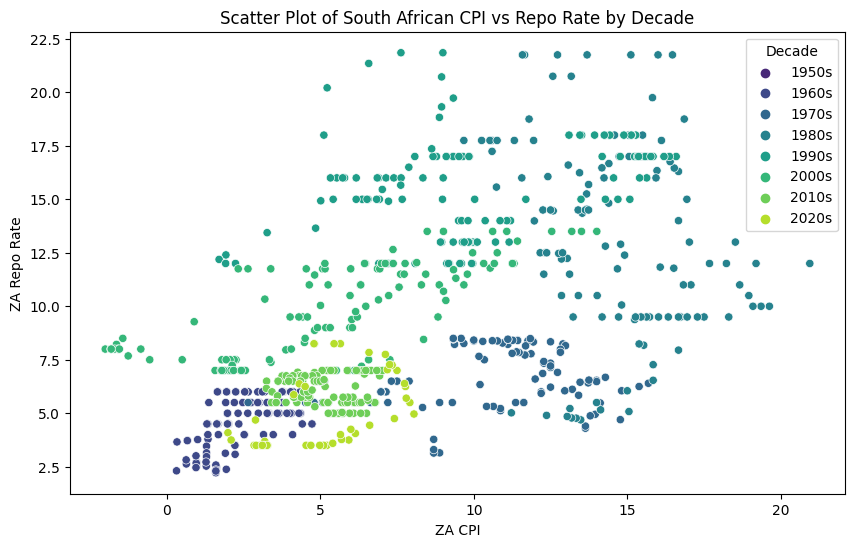

In [233]:
# Scatter plot for ZA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='za_cpi', y='za_repo', hue='decade', palette='viridis', data=combined_df)
plt.title('Scatter Plot of South African CPI vs Repo Rate by Decade')
plt.xlabel('ZA CPI')
plt.ylabel('ZA Repo Rate')
plt.legend(title='Decade')
plt.show()


This scatter plot contrasts the South African Consumer Price Index (CPI) with the Repo Rate across different decades. Each dot represents a pairing of CPI and Repo Rate values within a particular decade, color-coded for visual distinction.

**Tight Correlation in Earlier Decades:** In the 1950s and 1960s, indicated by dark and light blue dots, there's a tight cluster of CPI and Repo Rate values. This suggests a consistent policy approach where interest rates closely tracked inflation levels.

**Policy Shifts in the 1970s-1980s:** Green and light blue dots (1970s and 1980s) show higher CPI and Repo Rate values with increased scatter. This likely reflects economic instability and aggressive policy responses to high inflation.

**Stabilization Post-1990s:** Yellow dots (1990s) and dark green dots (2000s) are lower and more spread out, indicating a period of relative stabilization with a broader range of policy responses to inflation.

**Recent Trends:** The latest decade, shown in lime green (2010s) and the few points representing the 2020s, indicates a return to lower inflation and interest rates, with some recent increases potentially reflecting current economic challenges.

**Decadal Shifts:** There is a visible shift from high inflation and high interest rates in the earlier decades to more moderate levels in the later decades, aligning with global trends towards lower inflation and interest rates over time.

Scatter Plot for US CPI vs. US Federal Funds Rate

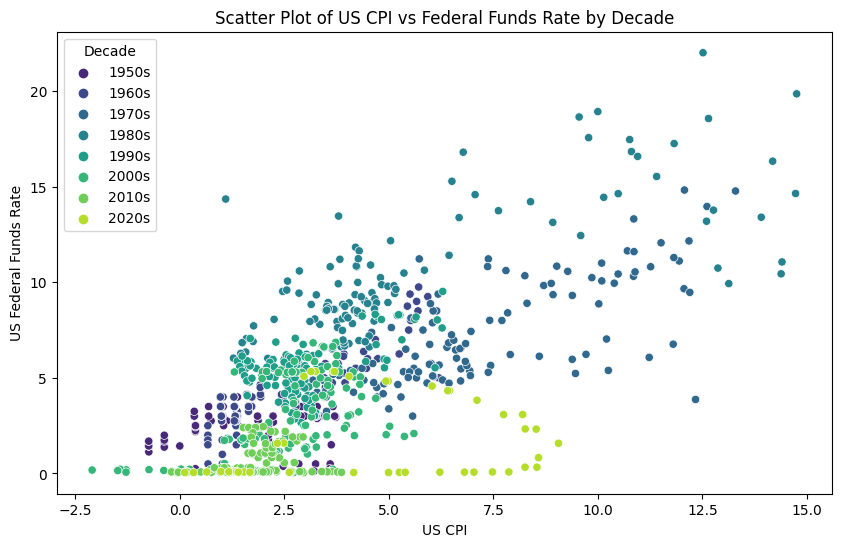

In [234]:
# Scatter plot for US
plt.figure(figsize=(10, 6))
sns.scatterplot(x='us_cpi', y='us_dff', hue='decade', palette='viridis', data=combined_df)
plt.title('Scatter Plot of US CPI vs Federal Funds Rate by Decade')
plt.xlabel('US CPI')
plt.ylabel('US Federal Funds Rate')
plt.legend(title='Decade')
plt.show()

This scatter plot displays the relationship between the US Consumer Price Index (CPI) and the Federal Funds Rate across different decades:

**Less Correlation Compared to South Africa:** The spread of points is broader with less of a clear pattern, suggesting a more complex relationship between CPI and interest rates in the US compared to South Africa.

**High Rates in the 1980s:** The cluster of higher Federal Funds Rate in the 1980s (light blue points) correlates with the Volcker era of high interest rates to combat inflation.

**Recent Period Stability:** The 2000s (dark green points) and 2010s (lime green points) show a concentration at the lower end of the Federal Funds Rate, aligning with the period of low interest rates post-financial crisis.

**2020s Inflation:** The 2020s (yellow points) are few but indicate rising CPI, which may reflect recent inflationary trends and the Federal Reserve's subsequent responses.

**Inflation Peaks Without Extreme Rates:** Unlike the South African scatter plot, high inflation rates (CPI above 10) aren't always paired with extremely high Federal Funds Rates, indicating periods where the Federal Reserve did not or could not respond with equivalently high rates.

Scatterplot of ZA repo vs US DFF

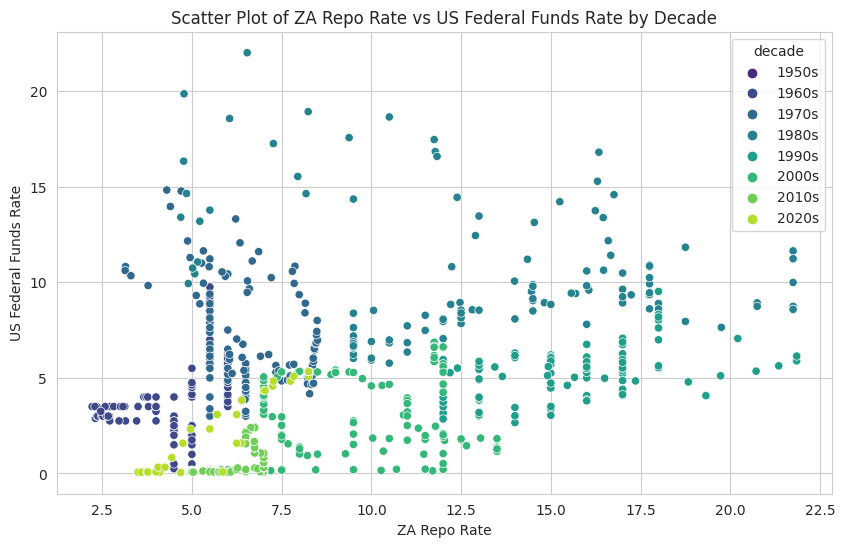

In [256]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x='za_repo', y='us_dff', hue='decade', palette='viridis', legend='full')

# Add title and labels
plt.title('Scatter Plot of ZA Repo Rate vs US Federal Funds Rate by Decade')
plt.xlabel('ZA Repo Rate')
plt.ylabel('US Federal Funds Rate')

# Show the plot
plt.show()

This scatter plot compares the Repo Rate of South Africa (ZA) to the Federal Funds Rate (DFF) of the United States across different decades:

**Divergent Policy Responses:** The plot shows a wide spread of values without a clear correlation, indicating divergent monetary policy responses between the two countries over the decades.

**Higher Rates in South Africa:** South Africa's Repo Rate is generally higher than the US Federal Funds Rate, possibly reflecting the higher inflation environment and/or the greater economic volatility often associated with emerging markets.

In [255]:
# Repeat in plotly to allow for more control of the visualisation

# Create the scatter plot
fig = go.Figure()

# Add a trace for the data, colored by decade
for decade in sorted(combined_df['decade'].unique()):
    filtered_df = combined_df[combined_df['decade'] == decade]
    fig.add_trace(
        go.Scatter(
            x=filtered_df['za_repo'],
            y=filtered_df['us_dff'],
            mode='markers',
            name=decade
        )
    )

# Update layout
fig.update_layout(
    title='Scatter Plot of ZA Repo Rate vs US Federal Funds Rate by Decade',
    xaxis=dict(title='ZA Repo Rate'),
    yaxis=dict(title='US Federal Funds Rate'),
    legend_title_text='Decade'
)

fig.show()

### Dynamic Scatter Plot Visualization

This section is dedicated to creating a dynamic scatter plot. This visualization will enable us to observe the relationship between different datasets over time, with each point representing a month and color-coded by decade.

In [246]:
# Define the series and settings
series_x = 'za_cpi'  # Change to 'za_cpi' for South African data
series_y = 'za_repo'  # Change to 'za_repo' for South African data

color_map = {
    '1950s': 'red',
    '1960s': 'green',
    '1970s': 'blue',
    '1980s': 'orange',
    '1990s': 'purple',
    '2000s': 'brown',
    '2010s': 'pink',
    '2020s': 'gray',
    # Add more decades and colors as needed
}


In [247]:
# Dynamic scatter plot

combined_df['decade'] = combined_df.index.year.map(lambda x: f'{x - x % 10}s')
combined_df.sort_index(inplace=True)

fig = go.Figure()

# Track the first month of each decade to update the legend correctly
decades_shown = set()

# Add a trace for each month, colored by decade
for date in sorted(combined_df.index.unique()):
    filtered_df = combined_df[combined_df.index == date]
    decade = filtered_df['decade'].iloc[0]
    show_legend = decade not in decades_shown
    decades_shown.add(decade)

    fig.add_trace(
        go.Scatter(
            x=filtered_df[series_x],
            y=filtered_df[series_y],
            name=decade,
            mode='markers',
            marker=dict(color=color_map[decade]),
            showlegend=show_legend
        )
    )

# Define the steps for the slider
steps = []
for i, date in enumerate(sorted(combined_df.index.unique())):
    step = dict(
        method="update",
        args=[{"visible": [True if j <= i else False for j in range(len(fig.data))]},
              {"title": f"Date: {date.strftime('%Y-%m')}"}],
    )
    steps.append(step)

# Add a slider to the figure
sliders = [dict(
    active=0,
    currentvalue={"prefix": "Date: "},
    steps=steps,
    transition={"duration": 300},
    pad={"t": 50}
)]

# Update layout
fig.update_layout(
    sliders=sliders,
    xaxis=dict(title=series_x),
    yaxis=dict(title=series_y),
    legend_title_text='Decade'
)

fig.show()

Use the slider to move through time.